In [5]:
#importing dataset
dataset = read.csv('Salary_Data.csv')

In [6]:
show(dataset)

   YearsExperience Salary
1              1.1  39343
2              1.3  46205
3              1.5  37731
4              2.0  43525
5              2.2  39891
6              2.9  56642
7              3.0  60150
8              3.2  54445
9              3.2  64445
10             3.7  57189
11             3.9  63218
12             4.0  55794
13             4.0  56957
14             4.1  57081
15             4.5  61111
16             4.9  67938
17             5.1  66029
18             5.3  83088
19             5.9  81363
20             6.0  93940
21             6.8  91738
22             7.1  98273
23             7.9 101302
24             8.2 113812
25             8.7 109431
26             9.0 105582
27             9.5 116969
28             9.6 112635
29            10.3 122391
30            10.5 121872


In [10]:
##splitting dataset into training and test set
library(caTools)
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset (dataset, split == TRUE)
test_set     = subset (dataset, split == FALSE)

In [11]:
#Fitting Simple linear regression on training set
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)

In [12]:
summary (regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [13]:
#Predicting the test set result
y_pred = predict(regressor, newdata = test_set)

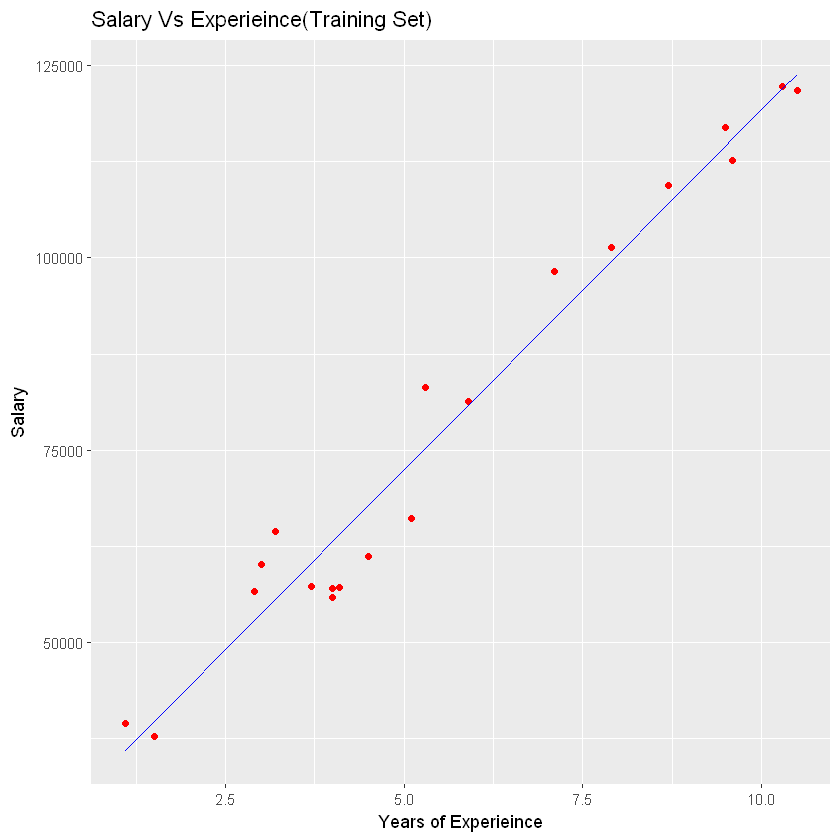

In [15]:
#Visualising the Training set results
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary Vs Experieince(Training Set)') +
  xlab('Years of Experieince') +
  ylab('Salary')

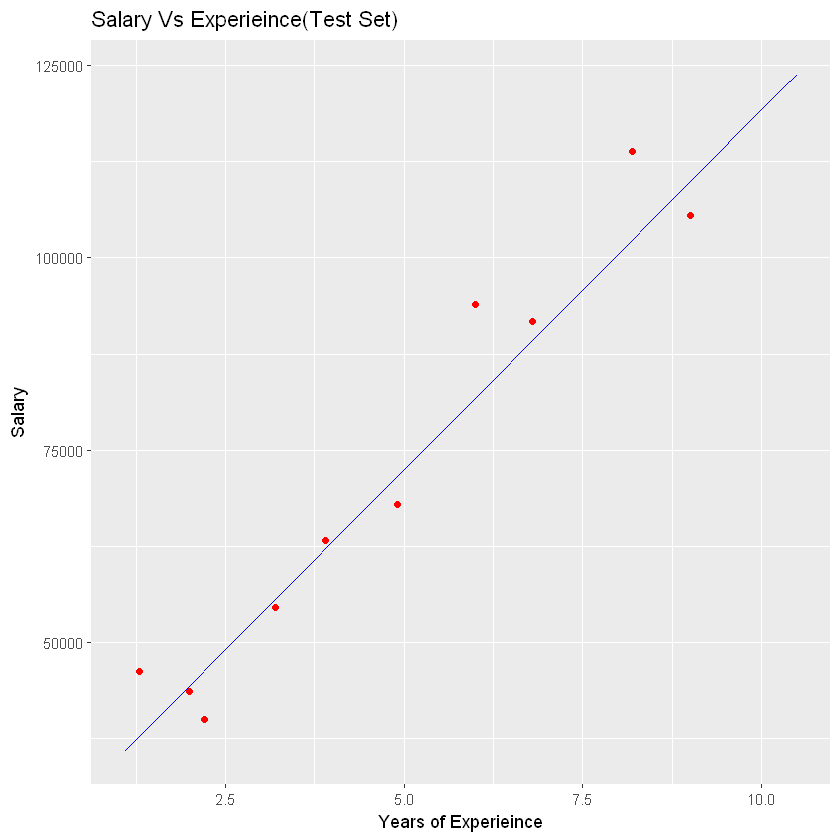

In [16]:
#Visualising the Test set results
library(ggplot2)
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary Vs Experieince(Test Set)') +
  xlab('Years of Experieince') +
  ylab('Salary')